In [32]:
# ----- LIBS

import os 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

# Roteiro

- Posicionamento e SF
- Métricas da camada PHY
- Cobertura/Alcance Lora
- Métricas de performance da rede completa (Mac Layer)
- Métricas de Consumo

# Posicionamento x SF

In [33]:
current_path = os.getcwd()
current_path

'/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/obstacle_exp'

In [34]:
# ----- DATASET

path = "network_position_coletores_unicamp.txt"
net_position_df = pd.read_csv(path, header=None) 
net_position_df.columns = ["nodeId", "posX", "posY", "posZ",
                           "sf", "gwId", "gw_posX", "gw_posY", "gw_posZ", "distance"]

# print(path)
print("\nSHAPE:", net_position_df.shape)
net_pos = net_position_df.iloc[0:47]

print("\nSHAPE:", net_pos.shape)
net_pos.head()


SHAPE: (6768000, 10)

SHAPE: (47, 10)


,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
0,0,1527.410,2180.210,1,7,47,1694.97,2141.47,44.9188,177.509
1,1,297.312,1965.810,1,7,47,1694.97,2141.47,44.9188,1409.340
2,2,1535.550,1646.180,1,7,47,1694.97,2141.47,44.9188,522.165
3,3,1149.490,1831.090,1,7,47,1694.97,2141.47,44.9188,629.144
4,4,1186.800,667.866,1,7,47,1694.97,2141.47,44.9188,1559.390


In [35]:
# ----- PLOT SIZE SETTINGS

# chart bounds
xMin_bound, xMax_bound = -500, 2000
yMin_bound, yMax_bound = 0, 2500 

# chart figsize
x_figsize, y_figsize = 5, 5


In [28]:
# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
    
    # circle
#     circle_lgd = mlines.Line2D([], [],
#                               color = 'white',
#                               marker = 'o',
#                               markeredgecolor = 'black',
#                               markeredgewidth = 0.5,
#                               markerfacecolor = 'white',
#                               markersize = 15,
#                               label='Radio Coverage')

#     plots_legends.append(circle_lgd)
    
    # ED points
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [],
                                  color = 'white',
                                  marker = 'o',
                                  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5,
                                  markerfacecolor = colors[sf],
                                  markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [],
                                  color = 'white',
                                  marker = (5,2),
                                  markeredgecolor = 'red',
                                  markeredgewidth = 0.5,
                                  markerfacecolor = 'red',
                                  markersize = 15, 
                                  label = 'GW')

    plots_legends.append(scatter_lgd)
    
    return plots_legends

In [29]:
# ----- EDs LISTS per SF

eds_x_sf7 = []
eds_y_sf7 = []
eds_x_sf8 = []
eds_y_sf8 = []
eds_x_sf9 = []
eds_y_sf9 = []
eds_x_sf10 = []
eds_y_sf10 = []
eds_x_sf11 = []
eds_y_sf11 = []
eds_x_sf12 = []
eds_y_sf12 = []

for i in range (len(net_pos)):
    if net_pos.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_pos.iloc[i].posX)
        eds_y_sf7.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_pos.iloc[i].posX)
        eds_y_sf8.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_pos.iloc[i].posX)
        eds_y_sf9.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_pos.iloc[i].posX)
        eds_y_sf10.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 11.0:
        eds_x_sf11.append(net_pos.iloc[i].posX)
        eds_y_sf11.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 12.0:
        eds_x_sf12.append(net_pos.iloc[i].posX)
        eds_y_sf12.append(net_pos.iloc[i].posY)

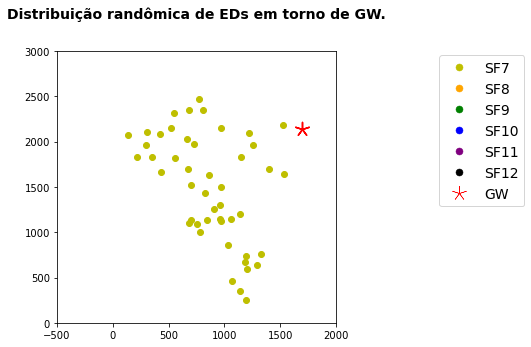

In [30]:
# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw a circle
# a_circle = plt.Circle((0, 0), xMax_bound, fill= False, linestyle = '--', linewidth = 1.5, label='Radio Coverage')
# ax.add_artist(a_circle)

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(net_pos.iloc[0].gw_posX, net_pos.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.7, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
plt.show()
# fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')